Scratch file for playing with the data and trying to fix errors / come up with robust graphs

In [2]:
import pandas as pd 
import numpy as np
import plotly as py
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns



In [33]:
df = pd.read_csv('Encoded_Unbalanced_Visa_Data.csv')

df.head()



,CASE_STATUS,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_NAME,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,...,EMPLOYER_STATE_CODE,AGENT_REPRESENTING_EMPLOYER_CODE,JOB_TITLE_CODE,WILLFUL_VIOLATOR_CODE,WORKSITE_CITY_CODE,WORKSITE_STATE_CODE,PW_UNIT_OF_PAY_CODE,PW_WAGE_LEVEL_CODE,WAGE_UNIT_OF_PAY_CODE,H1B_DEPENDENT_CODE
0,DENIED,TM BUSINESS SOLUTIONS INC.,PROVIDENCE,RI,N,CORPORATE TRAINER,"DOOR-TO-DOOR SALES WORKERS, NEWS AND STREET",1,0,1,...,42,0,13995,0,5005,38,3,0,3,0
1,DENIED,"PECAN POINT OKLAHOMA, LLC",COCONUT GROVE,FL,N,FARM LABOR,"FARMWORKERS AND LABORERS, CROP, NURSERY, AND",10,10,0,...,11,0,22148,0,2633,35,1,0,1,0
2,DENIED,VALIDATION TRANSCRIPTION SERVICES INC,PRINCETON,NJ,Y,VALIDATION ENGINEER,"ENGINEERS, ALL OTHERS",1,0,0,...,33,1,73569,0,1672,34,4,1,4,1
3,DENIED,"ZAT REALTY, LLC",PHOENIX,AZ,N,REAL ESTATE SALESPERSON,REAL ESTATE SALES AGENTS,1,1,0,...,5,0,46117,0,4816,3,4,0,4,0
4,DENIED,"KNOWBE4, INC.",CLEARWATER,FL,N,SOFTWARE ENGINEER,"SOFTWARE DEVELOPERS, APPLICATIONS",1,1,0,...,11,0,59153,0,1199,9,4,0,4,0


In [34]:
df.describe()

,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,ANNUALIZED_PREVAILING_WAGE,PREVAILING_WAGE,ANNUALIZED_WAGE_RATE_OF_PAY,WAGE_RATE_OF_PAY,...,EMPLOYER_STATE_CODE,AGENT_REPRESENTING_EMPLOYER_CODE,JOB_TITLE_CODE,WILLFUL_VIOLATOR_CODE,WORKSITE_CITY_CODE,WORKSITE_STATE_CODE,PW_UNIT_OF_PAY_CODE,PW_WAGE_LEVEL_CODE,WAGE_UNIT_OF_PAY_CODE,H1B_DEPENDENT_CODE
count,488395.000000,488395.000000,488395.000000,488395.000000,488395.000000,488395.000000,488395.000000,488395.000000,4.883950e+05,4.883950e+05,...,488395.000000,488395.000000,488395.000000,488395.000000,488395.000000,488395.000000,488395.000000,488395.000000,488395.000000,488395.000000
mean,1.957758,0.944901,0.309876,0.126928,0.007320,0.246638,76010.057392,73278.425038,8.896289e+04,8.587892e+04,...,27.102816,0.660848,39052.710779,0.000807,3493.708672,22.921600,3.881657,0.879712,3.882155,0.386769
std,5.066188,3.889588,1.203975,0.898335,0.158624,1.064545,26343.129639,29811.678057,3.784962e+04,4.124181e+04,...,15.098760,0.473422,22119.757815,0.028391,1951.289681,14.969746,0.583134,0.945809,0.581873,0.487010
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000e+04,7.625000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58739.000000,57262.000000,6.500000e+04,6.481240e+04,...,12.000000,0.000000,16361.000000,0.000000,1634.000000,9.000000,4.000000,0.000000,4.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,70221.000000,69389.000000,7.883200e+04,7.760000e+04,...,29.000000,1.000000,43112.000000,0.000000,3807.000000,22.000000,4.000000,1.000000,4.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,88234.000000,87693.000000,1.030000e+05,1.020000e+05,...,40.000000,1.000000,58528.000000,0.000000,5161.000000,36.000000,4.000000,1.000000,4.000000,1.000000
max,155.000000,150.000000,50.000000,50.000000,50.000000,150.000000,434200.000000,414007.000000,1.688000e+06,1.688000e+06,...,54.000000,1.000000,75656.000000,1.000000,7019.000000,50.000000,4.000000,3.000000,4.000000,1.000000


In [35]:
df.shape

(488395, 38)

In [7]:

#Group by CASE_STATUS 
Case_Status_Totals_df = df.groupby(['CASE_STATUS']).size().reset_index(name='counts')
print(Case_Status_Totals_df)

           CASE_STATUS  counts
0            CERTIFIED  440499
1  CERTIFIED-WITHDRAWN   42100
2               DENIED    5796


In [8]:
df["PW_WAGE_LEVEL"].value_counts(normalize = True) * 100

Level I      42.713992
Level II     35.352328
Level III    13.182158
Level IV      8.751523
Name: PW_WAGE_LEVEL, dtype: float64

In [10]:
#Group by WAGE_LEVEL AND CASE_STATUS 
Wage_Level_Status_Totals_df = df.groupby(['PW_WAGE_LEVEL', 'CASE_STATUS']).size().reset_index(name='counts')
print(Wage_Level_Status_Totals_df)

print("{}% were Denied".format(len(df[df['CASE_STATUS']=='DENIED'])/float(df.shape[0])*100))

   PW_WAGE_LEVEL          CASE_STATUS  counts
0        Level I            CERTIFIED  184913
1        Level I  CERTIFIED-WITHDRAWN   20882
2        Level I               DENIED    2818
3       Level II            CERTIFIED  158186
4       Level II  CERTIFIED-WITHDRAWN   12917
5       Level II               DENIED    1556
6      Level III            CERTIFIED   58934
7      Level III  CERTIFIED-WITHDRAWN    4648
8      Level III               DENIED     799
9       Level IV            CERTIFIED   38466
10      Level IV  CERTIFIED-WITHDRAWN    3653
11      Level IV               DENIED     623
1.1867443360394763% were Denied


In [11]:
# insert column and calculate if wage rate is greater than or equal to prevailing wage
df['PAY_ABOVE_PREV_WAGE'] = np.where(df['ANNUALIZED_WAGE_RATE_OF_PAY']>=df['ANNUALIZED_PREVAILING_WAGE'], '1', '0')

pay_compare = df.get(['ANNUALIZED_WAGE_RATE_OF_PAY', 'ANNUALIZED_PREVAILING_WAGE', 'PAY_ABOVE_PREV_WAGE'])
pay_compare.head(5)

pay_compare_totals_df = df.groupby(['PW_WAGE_LEVEL', 'PAY_ABOVE_PREV_WAGE']).size().reset_index(name='counts')

print(pay_compare_totals_df)

  PW_WAGE_LEVEL PAY_ABOVE_PREV_WAGE  counts
0       Level I                   0     481
1       Level I                   1  208132
2      Level II                   0     286
3      Level II                   1  172373
4     Level III                   0     122
5     Level III                   1   64259
6      Level IV                   0      89
7      Level IV                   1   42653


In [12]:
# insert column for certified - - certified & certified-withdrawn = 1
df['CERTIFIED'] = np.where(df['CASE_STATUS']!='DENIED', 'Y','N')
check = df.get(['CASE_STATUS', 'CERTIFIED'])
check.head(5)

,CASE_STATUS,CERTIFIED
0,CERTIFIED,Y
1,CERTIFIED,Y
2,DENIED,N
3,CERTIFIED,Y
4,CERTIFIED,Y


In [13]:
Work_State_Counts_df = df.groupby(['WORKSITE_STATE','CERTIFIED']).size().reset_index(name='counts')
print(Work_State_Counts_df)

# Percentage of certified petitions
#  DOESN'T CALC PROPERLY
#len(Work_State_Counts_df[Work_State_Counts_df.CERTIFIED=='Y'])/len(Work_State_Counts_df.CERTIFIED)*100.0


    WORKSITE_STATE CERTIFIED  counts
0               AK         N       1
1               AK         Y     161
2               AL         N      25
3               AL         Y    1297
4               AR         N      17
..             ...       ...     ...
96              WI         N      57
97              WI         Y    5149
98              WV         N      12
99              WV         Y     370
100             WY         Y     102

[101 rows x 3 columns]


C:\Users\linda\anaconda3\envs\ML_7331\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CERTIFIED', ylabel='count'>

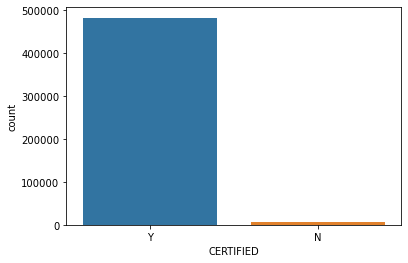

In [14]:
sns.countplot(df['CERTIFIED'])

In [15]:
# % of submissions by state - Top 10 shown

pd.DataFrame(df.EMPLOYER_STATE.value_counts(normalize = True)).head(10) * 100 

,EMPLOYER_STATE
CA,16.849681
TX,14.687087
NJ,12.511389
IL,6.759897
NY,6.461368
MI,4.569662
PA,4.075390
MA,3.753110
MD,3.446800
FL,3.104250


In [17]:
title = pd.DataFrame(df.JOB_TITLE.value_counts()).reset_index()
title["Percentage"] = pd.DataFrame(df.JOB_TITLE.value_counts
                                   (normalize = True) * 100).reset_index()["JOB_TITLE"]
title.columns = ["Title","Count","%"]
title.head(10)

,Title,Count,%
0,PROGRAMMER ANALYST,39783,8.145661
1,SOFTWARE ENGINEER,22480,4.602832
2,SOFTWARE DEVELOPER,12932,2.647857
3,SYSTEMS ANALYST,8596,1.760051
4,COMPUTER PROGRAMMER,6438,1.318195
5,BUSINESS ANALYST,5911,1.210291
6,COMPUTER SYSTEMS ANALYST,5377,1.100953
7,SENIOR SOFTWARE ENGINEER,5333,1.091944
8,DEVELOPER,4732,0.968888
9,ASSISTANT PROFESSOR,3658,0.748984


In [16]:
# Most popular job in a WORK SITE state BASED ON SUBMISSION

#NEED TO FIGURE OUT HOW TO RUN FOR TOTAL_WORKERS BY JOB TITLE

most_popular_job_title = df[["WORKSITE_STATE","JOB_TITLE"]]
most_popular_job_title = most_popular_job_title.groupby(["WORKSITE_STATE","JOB_TITLE"]).size().reset_index()
most_popular_job_title.columns = ['WORKSITE_STATE', 'JOB_TITLE', "COUNT"]

test = most_popular_job_title.groupby(['WORKSITE_STATE', 'JOB_TITLE']).agg({'COUNT':sum})
test = test['COUNT'].groupby(level=0, group_keys=False)

res = test.apply(lambda x: x.sort_values(ascending=False).head(1))
res = pd.DataFrame(res).reset_index()

tot = pd.DataFrame(df["WORKSITE_STATE"].value_counts()).reset_index()
tot.columns = ["WORKSITE_STATE","TOTAL"]

res = pd.merge(res, tot, on = "WORKSITE_STATE", how = "left")
res["PERCENTAGE"] = res["COUNT"] * 100 /res["TOTAL"]

print(res)

   WORKSITE_STATE                JOB_TITLE  COUNT  TOTAL  PERCENTAGE
0              AK                 RESIDENT     10    162    6.172840
1              AL      ASSISTANT PROFESSOR    100   1322    7.564297
2              AR       PROGRAMMER ANALYST    306   2294   13.339146
3              AZ       PROGRAMMER ANALYST    957   7702   12.425344
4              CA        SOFTWARE ENGINEER   6191  92320    6.706023
5              CO       PROGRAMMER ANALYST    309   5057    6.110342
6              CT       PROGRAMMER ANALYST    338   6529    5.176903
7              DC       PROGRAMMER ANALYST    236   3107    7.595752
8              DE       PROGRAMMER ANALYST    190   2686    7.073716
9              FL       PROGRAMMER ANALYST   1701  17282    9.842611
10             GA       PROGRAMMER ANALYST   1827  18363    9.949355
11             IA       PROGRAMMER ANALYST    258   2376   10.858586
12             ID       PROGRAMMER ANALYST     28    688    4.069767
13             IL       PROGRAMMER

In [18]:
df['SOC_NAME'].value_counts()

SOFTWARE DEVELOPERS, APPLICATIONS                     97598
COMPUTER SYSTEMS ANALYSTS                             73649
COMPUTER PROGRAMMERS                                  57775
COMPUTER OCCUPATIONS, ALL OTHER                       41972
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE                 14599
                                                      ...  
TELECOMMUNICATIONS EQUIPMENT INSTALLERS AND REPAIR        1
ELECTRICAL AND ELECTRONICS REPAIRERS, POWERHOUSE,         1
SOFTWAER DEVELOPERS, APPLICATIONS                         1
BUSINESS SYSTEMS ANALYTS                                  1
HAIRDRESSERS, HAIRSTYLISTS, AND COSMETOLOGISTS            1
Name: SOC_NAME, Length: 774, dtype: int64

<AxesSubplot:>

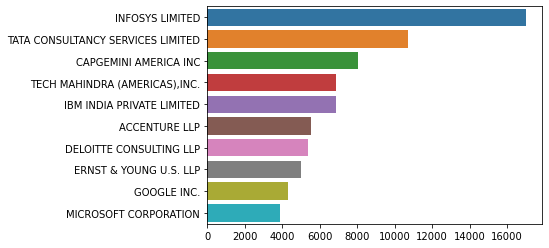

In [19]:
emp = df['EMPLOYER_NAME'].value_counts()[:10]
sns.barplot(x= emp.values, y = emp.index)

In [ ]:
#Top 10 companies based on TOTAL_WORKERS
emp = df['EMPLOYER_NAME'].value_counts()[:10]
sns.barplot(x= emp.values, y = emp.index)

In [ ]:
soc = df['SOC_NAME'].value_counts()[:10]
sns.barplot(x= soc.values, y = soc.index)

<AxesSubplot:>

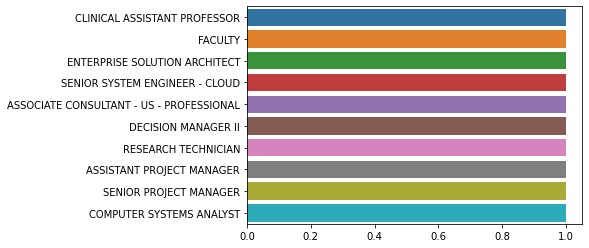

In [16]:
job = df['JOB_TITLE'].value_counts()[:10]
sns.barplot(x= job.values, y = job.index)

<AxesSubplot:ylabel='CASE_STATUS'>

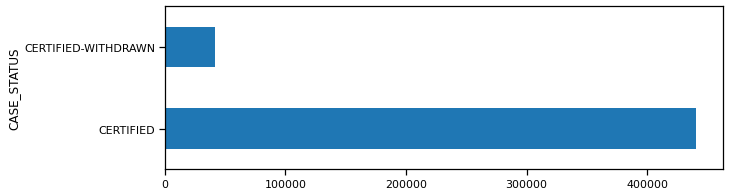

In [20]:
# H1-B Visa by Status
sns.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(10,3))
df4=df[df['CASE_STATUS'].isin(['CERTIFIED','CERTIFIED-WITHDRAWN'])]
df4.groupby(['CASE_STATUS']).size().plot(kind='barh')

In [21]:

df2 = df.get(['WORKSITE_STATE', 'CERTIFIED'])
df2.head(5)
df2.shape
print (df2.dtypes)


WORKSITE_STATE    object
CERTIFIED         object
dtype: object


In [22]:
# Get indexes where name column has value john
indexNames = df2[df2['CERTIFIED'] == 'N'].index
 
# Delete these row indexes from dataFrame
df2.drop(indexNames, inplace=True)

C:\Users\linda\anaconda3\envs\ML_7331\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:

WState = df2.get(['WORKSITE_STATE', 'CERTIFIED'])

WState.groupby('WORKSITE_STATE').agg({'CERTIFIED': ['count']})

#REDO INCLUDE TOTAL WORKERS, FILTER TO REMOVE DENIED THEN DO THE AGG COUNT ON TOTAL WORKERS


,CERTIFIED
,count
WORKSITE_STATE,
AK,161
AL,1297
AR,2277
AZ,7642
CA,91148
CO,5000
CT,6467
DC,3062


In [20]:
import mpl_toolkits
conda install -c conda-forge basemap-data-hires

SyntaxError: invalid syntax (<ipython-input-20-1daf9490b043>, line 2)

In [21]:
from mpl_toolkits.basemap import Basemap

from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
popdensity = {
'AK': 161,
'AL': 1297,
'AR': 2277,
'AZ': 7642,
'CA': 91148,
'CO': 5000,
'CT': 6467,
'DC': 3062,
'DE': 2659,
'FL': 16981,
'GA': 18182,
'IA': 2348,
'ID': 678,
'IL': 25322,
'IN': 4730,
'KS': 2137,
'KY': 2094,
'LA': 1527,
'MA': 19555,
'MD': 8239,
'ME': 505,
'MI': 16207,
'MN': 8304,
'MO': 6424,
'MS': 575,
'MT': 129,
'NC': 13398,
'ND': 338,
'NE': 1664,
'NH': 1131,
'NJ': 34316,
'NM': 620,
'NV': 1062,
'NY': 39343,
'OH': 11921,
'OK': 1347,
'OR': 3628,
'PA': 16972,
'RI': 1902,
'SC': 2293,
'SD': 233,
'TN': 5343,
'TX': 52439,
'UT': 2365,
'VA': 13990,
'VI': 37,
'VT': 315,
'WA': 18671,
'WI': 5149,
'WV': 370,
'WY': 102}

# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 450 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Filling State Polygons by Population Density')
plt.show()


ImportError: cannot import name 'dedent' from 'matplotlib.cbook' (C:\Users\linda\anaconda3\envs\ML_7331\lib\site-packages\matplotlib\cbook\__init__.py)

In [ ]:
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
popdensity = {
'New Jersey':  438.00,
'Rhode Island':   387.35,
'Massachusetts':   312.68,
'Connecticut':    271.40,
'Maryland':   209.23,
'New York':    155.18,
'Delaware':    154.87,
'Florida':     114.43,
'Ohio':  107.05,
'Pennsylvania':  105.80,
'Illinois':    86.27,
'California':  83.85,
'Hawaii':  72.83,
'Virginia':    69.03,
'Michigan':    67.55,
'Indiana':    65.46,
'North Carolina':  63.80,
'Georgia':     54.59,
'Tennessee':   53.29,
'New Hampshire':   53.20,
'South Carolina':  51.45,
'Louisiana':   39.61,
'Kentucky':   39.28,
'Wisconsin':  38.13,
'Washington':  34.20,
'Alabama':     33.84,
'Missouri':    31.36,
'Texas':   30.75,
'West Virginia':   29.00,
'Vermont':     25.41,
'Minnesota':  23.86,
'Mississippi':   23.42,
'Iowa':  20.22,
'Arkansas':    19.82,
'Oklahoma':    19.40,
'Arizona':     17.43,
'Colorado':    16.01,
'Maine':  15.95,
'Oregon':  13.76,
'Kansas':  12.69,
'Utah':  10.50,
'Nebraska':    8.60,
'Nevada':  7.03,
'Idaho':   6.04,
'New Mexico':  5.79,
'South Dakota':  3.84,
'North Dakota':  3.59,
'Montana':     2.39,
'Wyoming':      1.96,
'Alaska':     0.42}
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 450 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Filling State Polygons by Population Density')
plt.show()

In [22]:
# Percentage of certified petitions
len(df[df.CERTIFIED=='Y'])/len(df)*100.0

AttributeError: 'DataFrame' object has no attribute 'CERTIFIED'

In [32]:

#This makes a DataFrame with the certified rates of the top 25 (most common) careers

soc = df2.groupby(by='SOC_NAME)
soc_desc = soc.describe()
soc_desc = soc_desc['ANNUALIZED_WAGE_RATE_OF_PAY']
soc_desc = soc_desc.sort_values(by=['count'], ascending=False)
soc.cert = soc_desc['count']
soc.cert 



KeyError: 'SOC_NAME'

In [ ]:
grps = data_sample_refused.groupby(by = 'SOC_NAME')
jobs_desc = grps.describe()
jobs_desc = jobs_desc['ANNUALIZED_WAGE_RATE_OF_PAY']
jobs_desc = jobs_desc.sort_values(by=['count'], ascending=False)
jobs_refused = jobs_desc['count']